## Exercise 3.9 Bayesian analysis of the uniform distribution

Consider the uniform distribution $\mathrm{Unif}(0,θ)$. The maximum likelihood estimate is $\theta = \max(D)$, as we
saw in Exercise 3.8, but this is unsuitable for predicting future data since it puts zero probability mass outside the training data. In this exercise, we will perform a Bayesian analysis of the uniform distribution (following (Minka 2001a)). The conjugate prior is the Pareto distribution, $p(\theta) = \mathrm{Pareto}(\theta|b, K)$, defined in Section 2.4.6 (see below). Given a Pareto prior, the joint distribution of $\theta$ and $D = (x_1,\ldots,x_N )$ is

$$
p(D, \theta) = \frac{Kb^K}{\theta^{N+K+1}}\mathbb{I}(\theta \ge \max(D)) 
$$

Let $m=\max(D)$. The evidence (the probability that all $N$ samples came from the same uniform distribution) is 

\begin{aligned}
p(D) & = \int_m^\infty\frac{Kb^K}{\theta^{N+K+1}}d\theta \\
& = \left\{\begin{array}{ll}\frac{K}{(N+K)b^N} & \mathrm{if}\, m \le b\\
\frac{Kb^K}{(N+K)m^{N+K}} & \mathrm{if}\, m > b\end{array}\right.
\end{aligned}

Derive the posterior $p(\theta|D)$, and show that it can be expressed as a Pareto distribution.

### Show that the Pareto distribution is the conjugate prior to the Uniform distribution

For a uniform distribution $U(0, \theta)$, the likelihood of the distribution is 

\begin{aligned}
l(\theta|D) & = \prod_ip(x_i|\theta) = \prod_i\frac{1}{\theta}\mathbb{I}(0 < x_i\le \theta) \\
& = \theta^{-n}\prod_i\mathbb{I}(x_i\le\theta) = \theta^{-n}\mathbb{I}(\theta\ge\max(x_1,\ldots,x_n)) \\
\end{aligned}

The $\mathrm{Pareto}(b, K)$ distribution has density

$$
p(\theta) = \left\{\begin{array}{l}Kb^K\theta^{-(K+1)} & \theta\ge b\\
0 & \mathrm{otherwise}\end{array}\right.
$$

where $b, K > 0$. The Pareto distribution has mean $\frac{Kb}{(K-1)}$ for $K>1$ and a variance of $\frac{Kb^2}{(K-1)^2(K-2)}$ for $K>2$.

If $m = \max(x_1,\ldots, x_n)$, the likelihood can be written as 

$$
l(\theta|D) = \theta^{-n}\mathbb{I}(m\le\theta) \propto \theta^{-[(n-1)+1]}(n-1)m^{n-1}\mathbb{I}(m\le\theta),
$$

which is a Pareto distribution with parameters $n-1$ and $m$ (you can do this because $n$ and $m$ are constants). Together with a $\mathrm{Pareto}(K, b)$ prior, we derive the posterior as 

\begin{aligned}
p(\theta|D) & \propto \theta^{-n}\mathbb{I}(m\le\theta)Kb^K\theta^{-(K+1)}\mathbb{I}(b\le\theta)\\
& \propto \theta^{-n+K+1}\mathbb{I}(\max(b,m) \le \theta)
\end{aligned}

which is a $\mathrm{Pareto}(n+K, \max(b, m))$ distribution. Thus the Pareto distribution is a conjugate prior of the uniform distribution.

### Solution

From Bayes' rule

$$
p(\theta|D) = \frac{p(D|\theta)p(\theta)}{p(D)} = \frac{p(D,\theta)}{p(D)} = \frac{Kb^K}{\theta^{N+K+1}}\mathbb{I}(\theta\ge\max(D, b))\frac{1}{p(D)}
$$

Now we can break this equation into two cases. The first case correspond to $m\le b$:

$$
p(\theta|D) = \frac{Kb^K}{\theta^{N+K+1}}\mathbb{I}(\theta\ge\max(D, b))\frac{(N+K)b^N}{K}=\frac{(N+K)b^{N+K}}{\theta^{N+K+1}}\mathbb{I}(\theta\ge b) = \mathrm{Pareto}(\theta|N+K, b)
$$

The second case correspond to $m > b$:

$$
p(\theta|D) =\frac{Kb^K}{\theta^{N+K+1}}\mathbb{I}(\theta\ge\max(D, b))\frac{(N+K)m^{N+K}}{Kb^K} = \frac{(N+K)m^{N+K}}{\theta^{N+K+1}}\mathbb{I}(\theta\ge m) = \mathrm{Pareto}(\theta|N+K, m)
$$

Therefore, the posterior is given by the following Pareto distribution:

$$
p(\theta|D) = \mathrm{Pareto}(\theta|N + K, \max(m, b))
$$

### Conclusion
First, let's take a look on the prior $\mathrm{Pareto}(\theta|K, b)$. This prior is encoding the following belief: the parameter $\theta$ **must** be bigger than $b$ (since the distribution is zero when $\theta < b$). Moreover, the value of $K$ (the shape parameter) is encoding our belief that the true result is near $b$. For instance, if $K$ goes to infinity, we are basically saying $\theta = b$. On the other hand, if $K$ goes to 0 then there is a fair chance that the parameter might be a value distant from $b$.

With the fresh analysis on a Pareto distribution, let's take a new look at the posterior $p(\theta|D) = \mathrm{Pareto}(\theta|N+K, \max(m, b))$. The distribution tells us two new things: First, the $\mathrm{MLE}(m)$ and our prior hyperparameter $b$ will dispute to see who will be the most probable value for $\theta$. The winner will be the bigger value. To see why this is true think this way: the prior states 'I believe that the parameter is equal or bigger than $b$'. At the same time, our dataset states: "The parameter must be equal or bigger than $\max(|x_i|, x_i\in D)$. So it is only natural that the parameter will be equal or bigger than the maximum between them.

The second discovery is about the size of the dataset. The first parameter of the Pareto distribution goes from $K$ to $N+K$. This is essentially saying the following: 'The more data we have, the more certain we know that the parameter is close to $\max(m, b)$' (since as the first parameter goes to infinity the Pareto distribution tends to a Dirac delta).

## Pareto distributon
The Pareto distribution is used to model the distribution of quantiles that exhibit **long tails**, also called **heavy tails**. The Pareto pdf is defined as follows:

$$
\mathrm{Pareto}(x|k, m) = km^k x^{-(k+1)}\mathbb I(x\ge m)
$$

This density assers that $x$ must be greater than some constant $m$, but not too much greater, where $k$ controls what is too much. As $k\rightarrow\infty$, the distribution approaches $\delta(x-m).$

In [134]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(font_scale=1.2)

In [158]:
def pareto(x, k, m):
    y = k*m**k*x**(-k-1)
    y[x < m] = 0
    return y

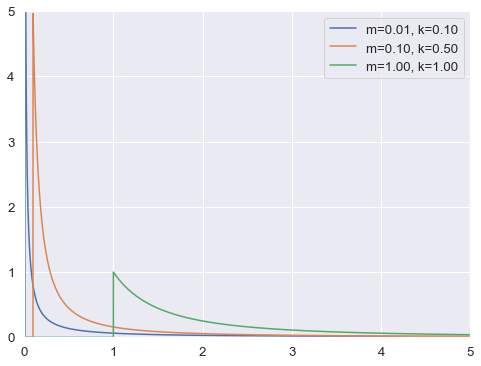

In [168]:
x = np.linspace(0.001, 5, 10000)
f, ax = plt.subplots(figsize=(8, 6))

for m, k in [(0.01, 0.10), (0.1, 0.5), (1, 1)]:
    y = pareto(x, k, m)
    ax.plot(x, y, label='m={:.2f}, k={:.2f}'.format(m, k))
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
plt.legend();